In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
words = open('../datasets/names.txt', 'r').read().splitlines()
print(len(words))

32033


In [3]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

print(sorted(b.items(), key= lambda kv: -kv[1]))

[(('n', '<E>'), 6763), (('a', '<E>'), 6640), (('a', 'n'), 5438), (('<S>', 'a'), 4410), (('e', '<E>'), 3983), (('a', 'r'), 3264), (('e', 'l'), 3248), (('r', 'i'), 3033), (('n', 'a'), 2977), (('<S>', 'k'), 2963), (('l', 'e'), 2921), (('e', 'n'), 2675), (('l', 'a'), 2623), (('m', 'a'), 2590), (('<S>', 'm'), 2538), (('a', 'l'), 2528), (('i', '<E>'), 2489), (('l', 'i'), 2480), (('i', 'a'), 2445), (('<S>', 'j'), 2422), (('o', 'n'), 2411), (('h', '<E>'), 2409), (('r', 'a'), 2356), (('a', 'h'), 2332), (('h', 'a'), 2244), (('y', 'a'), 2143), (('i', 'n'), 2126), (('<S>', 's'), 2055), (('a', 'y'), 2050), (('y', '<E>'), 2007), (('e', 'r'), 1958), (('n', 'n'), 1906), (('y', 'n'), 1826), (('k', 'a'), 1731), (('n', 'i'), 1725), (('r', 'e'), 1697), (('<S>', 'd'), 1690), (('i', 'e'), 1653), (('a', 'i'), 1650), (('<S>', 'r'), 1639), (('a', 'm'), 1634), (('l', 'y'), 1588), (('<S>', 'l'), 1572), (('<S>', 'c'), 1542), (('<S>', 'e'), 1531), (('j', 'a'), 1473), (('r', '<E>'), 1377), (('n', 'e'), 1359), (('l'

In [4]:
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

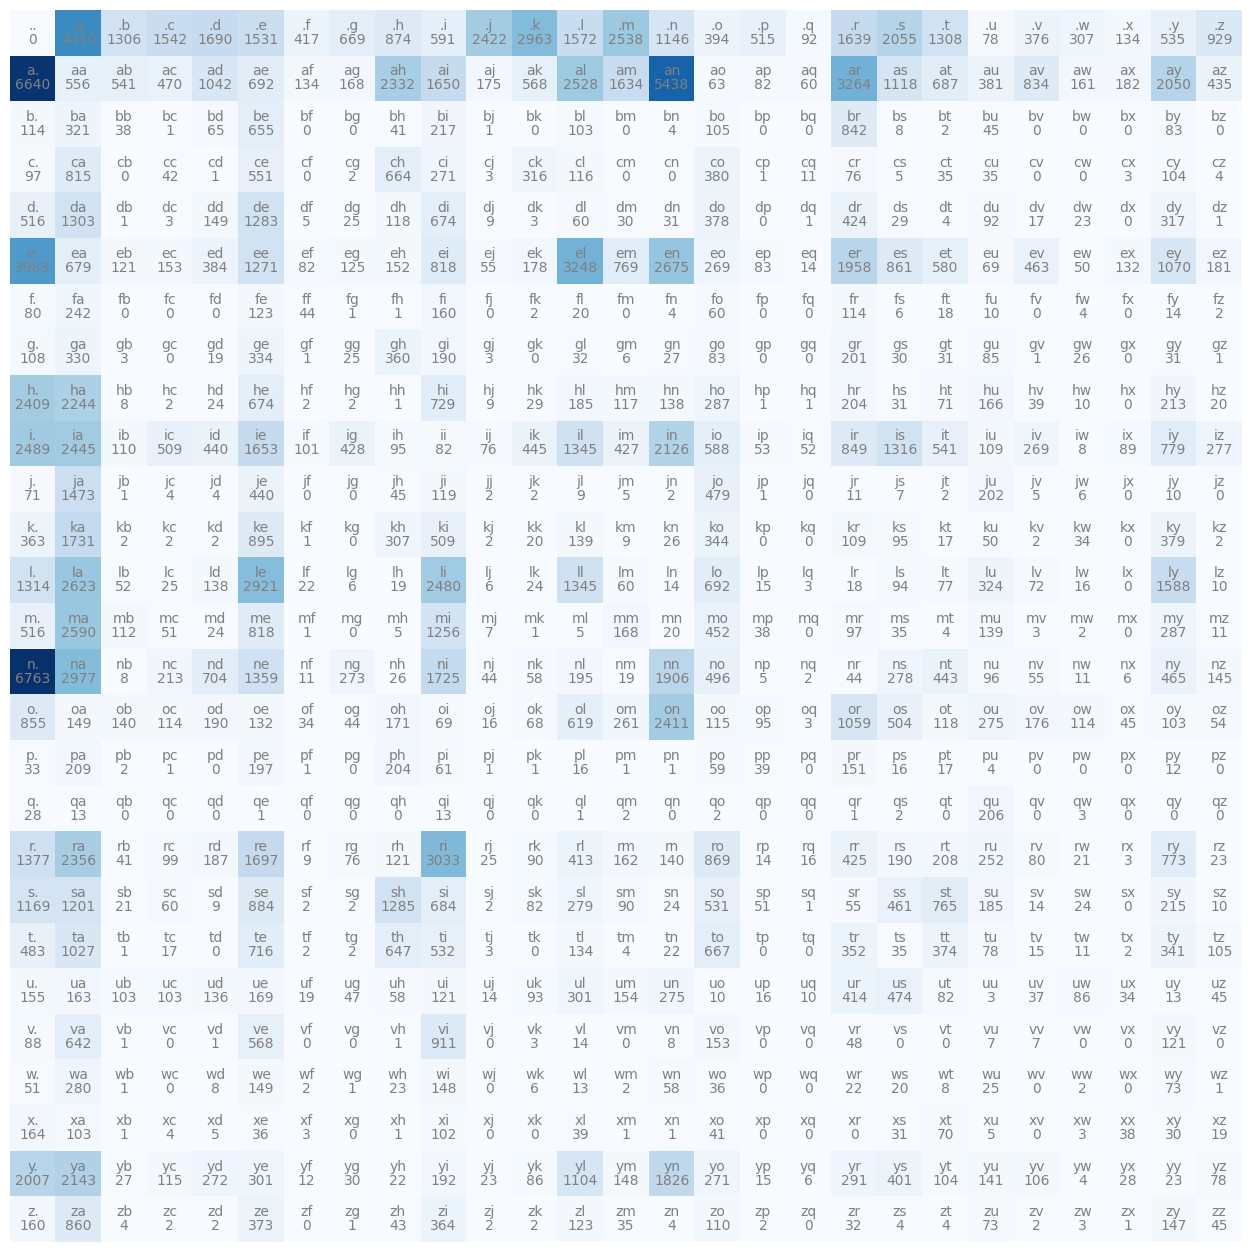

In [5]:
itos = {i:s for s,i in stoi.items()}

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')

plt.axis('off')

In [6]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [7]:
# Broadcasting the column level sum
# Add 1 to all numbers i.e. perform Model smoothing to avoid negative log likelihoods
P = (N+1).float()
P = P / P.sum(1, keepdim=True)

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

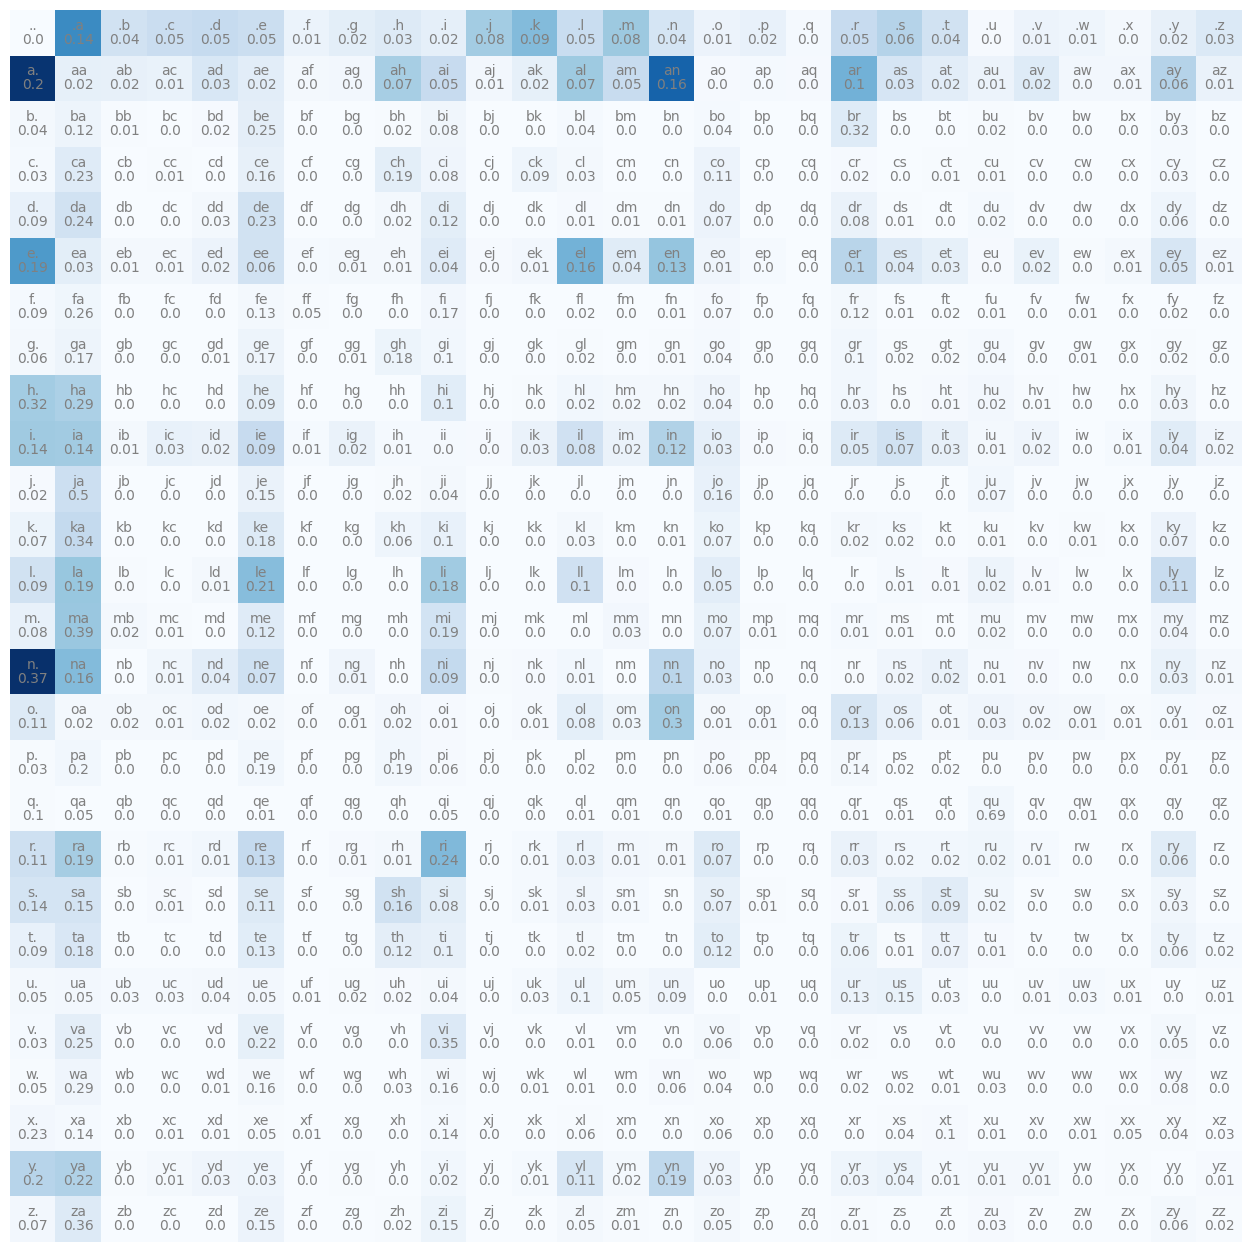

In [8]:
itos = {i:s for s,i in stoi.items()}

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, round(P[i, j].item(), 2), ha="center", va="top", color='gray')

plt.axis('off')

In [9]:
# Sampling more words
g = torch.Generator().manual_seed(2147483647)

for i in range(40):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.
feniee.
zem.
deru.
firit.
gaikajahahbevare.
kiysthelenaririenah.
keen.
x.
al.
kal.
thavazeeromysos.
laitenimieegariseriyen.
k.
illeleldole.
meenisammigama.
mmin.
asharin.
alcalar.
jayn.
asaz.


In [10]:
# Goal: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing negative log likelihood
# equivalent to minimizing the averga negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f}, {logprob:.4f}')

print(f'{log_likelihood=}')

# Negative Log Likelihood
nll = -log_likelihood
print(f'{nll=}')

# Loss
print(f'Loss: {nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
Loss: 2.4543561935424805


In [11]:
# Create the Training set of all the bigrams (x,y)
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print('Number of examples: ', xs.nelement())

Number of examples:  228146


In [14]:
nlls = torch.zeros(5)

for i in range(5):
    x = xs[i].item() # input character index
    y = ys[i].item() # output character index

    print('----------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print('input to neural net: ', x)
    print('output probabilities from the neural net', probs[i])
    print('label (actual next character):', y)
    
    p = probs[i, y]
    print('probability assigned by the net to the correct character: ', p.item())

    logp = torch.log(p)
    print('log likelihood: ', logp.item())

    nll = -logp
    print('negative log likelihood: ', nll.item())

    nlls[i] = nll

print('============')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())


----------
bigram example 1: .e (indexes 0, 5)
input to neural net:  0
output probabilities from the neural net tensor([0.0007, 0.1373, 0.0407, 0.0480, 0.0526, 0.0476, 0.0131, 0.0209, 0.0272,
        0.0185, 0.0754, 0.0922, 0.0489, 0.0790, 0.0357, 0.0124, 0.0161, 0.0032,
        0.0510, 0.0639, 0.0407, 0.0028, 0.0119, 0.0097, 0.0045, 0.0168, 0.0290],
       grad_fn=<SelectBackward0>)
label (actual next character): 5
probability assigned by the net to the correct character:  0.04764772951602936
log likelihood:  -3.0439202785491943
negative log likelihood:  3.0439202785491943
----------
bigram example 2: em (indexes 5, 13)
input to neural net:  5
output probabilities from the neural net tensor([0.1943, 0.0330, 0.0062, 0.0077, 0.0188, 0.0618, 0.0044, 0.0064, 0.0077,
        0.0398, 0.0032, 0.0089, 0.1583, 0.0374, 0.1303, 0.0132, 0.0045, 0.0014,
        0.0953, 0.0419, 0.0282, 0.0038, 0.0226, 0.0030, 0.0067, 0.0520, 0.0090],
       grad_fn=<SelectBackward0>)
label (actual next character): 

In [13]:
import torch.nn.functional as F

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

print(len(xs))
print(xs[:5])
xenc = F.one_hot(xs, num_classes=27).float()
print(len(xenc))
print(xenc[:5])
print(xenc.shape)
print('=================')

for k in range(500):
    # Forward Pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W # log counts

    # Softmax activation function
    counts = logits.exp() # equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for the next character

    # print(probs[:5])
    # print(probs.shape)

    predicted_result = probs[torch.arange(xs.nelement()), ys]
    log_likelihood = predicted_result.log()
    negative_log_likelihood = -log_likelihood
    loss = negative_log_likelihood.mean() + 0.01*(W**2).mean() # smoothing through regularization
    print(loss.item())
    
    # Backward pass
    W.grad = None # Set to zero the gradient
    loss.backward()

    # Update weights
    W.data += -50 * W.grad

228146
tensor([ 0,  5, 13, 13,  1])
228146
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])
torch.Size([228146, 27])
3.76861834526062
3.3788065910339355
3.161090850830078
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188305854797363
2.696505546569824
2.6773719787597656
2.6608054637908936
2.6463515758514404
2.633665084838867
2.622471570968628


In [15]:
# Sampling more words through our neural net
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        #print(counts)
        p = counts / counts.sum(1, keepdims=True)


        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
fobspehinivenvtahlasu.
dsor.
br.
jol.
pen.
aisan.
ja.
